In [1]:
import numpy
import matplotlib.pyplot as plt
import collections

In [25]:
def read_fasta(fp):
    name, seq = None, []
    for line in fp:
        line = line.rstrip()
        if line.startswith(">"):
            if name: yield (name, ''.join(seq))
            name, seq = line, []
        else:
            seq.append(line)
    if name: yield (name, ''.join(seq))

def diff_nucleotide(a,b):
    return sum ( a[i] != b[i] for i in range(len(a)) )

def get_year(s):
    return s.split('/')[-1]

def plot_part_a(dict, fist_seq):
    print("Part a")
    final_diff = 0
    final_seq_len = 0
    for year, seqs in dict.items():
        for seq in seqs:
            final_diff = diff_nucleotide(fist_seq, seq)
            final_seq_len = len(seq)
            plt.scatter(year, final_diff, c = 'black')
    #print("# of accumulated differences " + str(final_diff))
    #print("length of final sequence" +  str(final_seq_len))
    
    plt.title("Differences Accumulated Since First Sample")
    plt.ylabel("Number of Single Nucleotide Differences")
    plt.xlabel("Sampling Year")
    plt.xticks(rotation=90)
    plt.savefig("1a.png", bbox_inches='tight')
    plt.show()

def plot_part_b(dict):
    print("Part b")
    diff = []
    for year, seqs in dict.items():
        pairs = res = [(a, b) for idx, a in enumerate(seqs) for b in seqs[idx + 1:]]
        for pair in pairs:
            diff.append(diff_nucleotide(pair[0], pair[1]))
    
    print("average number of mutations within a year = " + str(sum(diff)/len(diff)))
    '''
            plt.scatter(year, diff_nucleotide(pair[0], pair[1]), c = 'black')
    plt.title("Differences Between Each Pair of Strains from the Same Year")
    plt.ylabel("Number of Single Nucleotide Differences")
    plt.xlabel("Sampling Year")
    plt.xticks(rotation=90)
    plt.savefig("1b.png", bbox_inches='tight')
    plt.autoscale()
    plt.show()
    '''

In [5]:
with open('problem_set_data/influenza_HA_dna_sequences.fasta') as fp:
    year_difference_dict = {}
    for name, seq in read_fasta(fp):
        if name == ">A/Aichi/2/1968":
            print("first sequence: " + name)
            first_seq  = seq
        year = get_year(name)
        if year in year_difference_dict:
            year_difference_dict[year].append(seq)
        else:
            year_difference_dict[year] = [seq]
    print("differences calculated")
    
    year_difference_dict = collections.OrderedDict(sorted(year_difference_dict.items()))
    

first sequence: >A/Aichi/2/1968
differences calculated


Part a
# of accumulated differences 215
length of final sequence1694


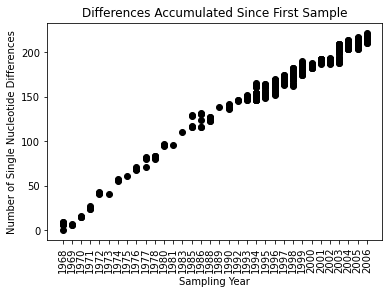

In [21]:
plot_part_a(year_difference_dict, first_seq)

In [23]:
# find turnover time
mutations_per_year = 215 / (2006 - 1968)
print(mutations_per_year)

5.657894736842105


In [26]:
plot_part_b(year_difference_dict)

Part b
average number of mutations within a year = 13.316864454670219
